In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
stores = pd.read_csv('store.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1


In [4]:
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [5]:
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [6]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\1500465921.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['WeekOfYear'] = train.index.weekofyear


count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [7]:
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

UsageError: Unknown variable '['CompetitionDistance']'


In [8]:
stores.fillna(0, inplace=True)

In [9]:
stores.isnull()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1110,False,False,False,False,False,False,False,False,False,False
1111,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False


In [10]:
train['SalePerCustomer'].fillna(0, inplace=True)
train['SalePerCustomer']

Date
2015-07-31     9.482883
2015-07-31     9.702400
2015-07-31    10.126675
2015-07-31     9.342457
2015-07-31     8.626118
                ...    
2013-01-01     0.000000
2013-01-01     0.000000
2013-01-01     0.000000
2013-01-01     0.000000
2013-01-01     0.000000
Name: SalePerCustomer, Length: 1017209, dtype: float64

In [11]:
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,0.0
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,0.0
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,0.0
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,0.0
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,0.0


In [12]:
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
zero_sales.count()

Store              54
DayOfWeek          54
Sales              54
Customers          54
Open               54
Promo              54
StateHoliday       54
SchoolHoliday      54
Year               54
Month              54
Day                54
WeekOfYear         54
SalePerCustomer    54
dtype: int64

In [13]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train.shape

(844338, 13)

In [14]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [15]:
stores.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [16]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5.845774,15.835706,23.646946,9.493641
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,3.323959,8.683392,14.389931,2.197448
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,2.749075
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000,7.895571
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000,9.250000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,2014.000000,8.000000,23.000000,35.000000,10.899729
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000,64.957854


C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\4180121407.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),vmin=-1, vmax=+1, annot=True, cmap="coolwarm")


<Axes: >

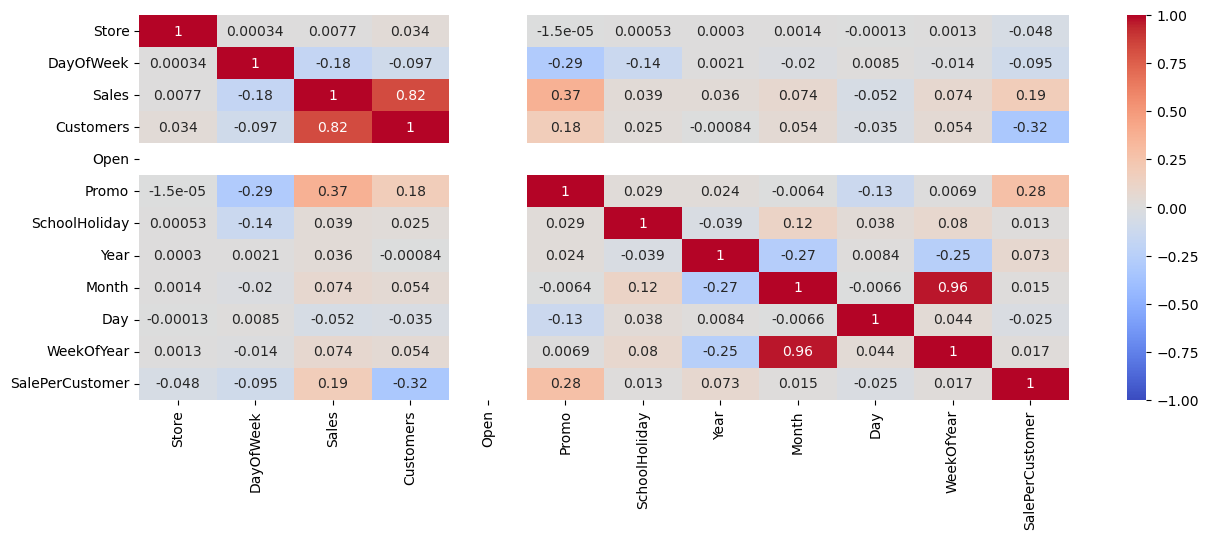

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(train.corr(),vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\446783736.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stores.corr(),vmin=-1, vmax=+1, annot=True, cmap="coolwarm")


<Axes: >

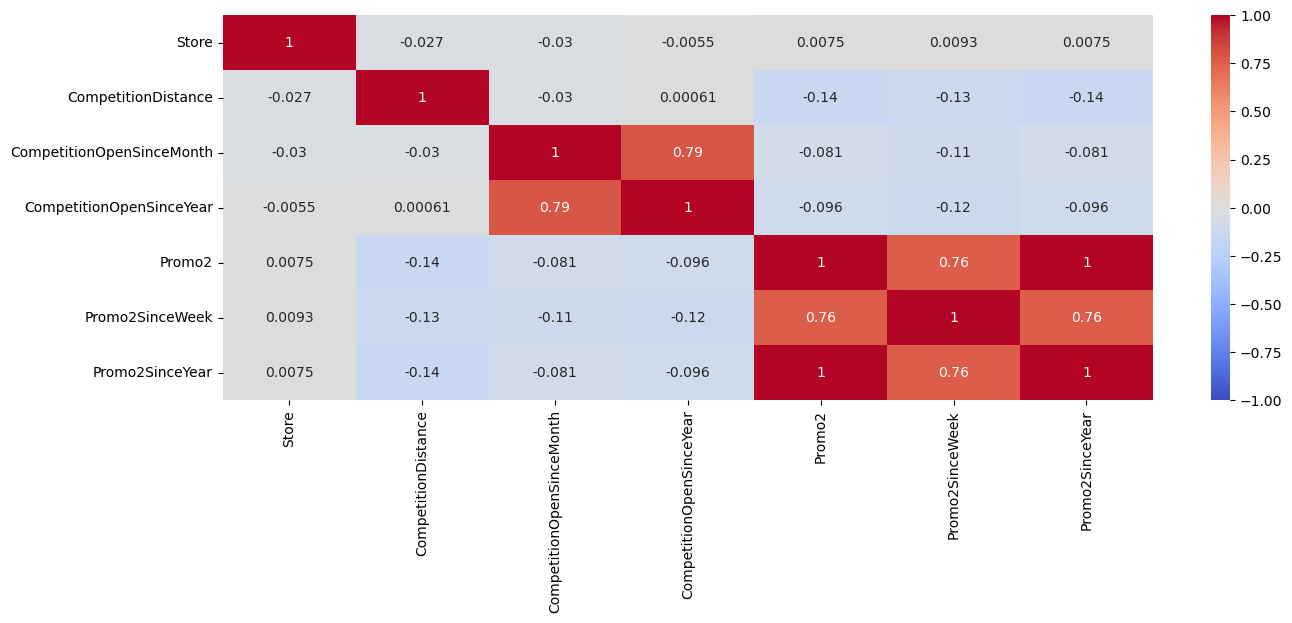

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(stores.corr(),vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

In [19]:
print("Joining train set with an additional store information.")

train_store = pd.merge(train, stores, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [20]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [21]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\3647216997.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_store.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


In [22]:
from scipy import stats
from scipy.stats import normaltest
stat, p = normaltest(train_store['Customers'])
print('Statistics=%.3f, p-value=%.3f' %(stat, p))

alpha = 0.05
if p > alpha:
    print('Распределение является нормальным')
else:
    print('Распределение не является нормальным')

Statistics=524363.882, p-value=0.000
Распределение не является нормальным


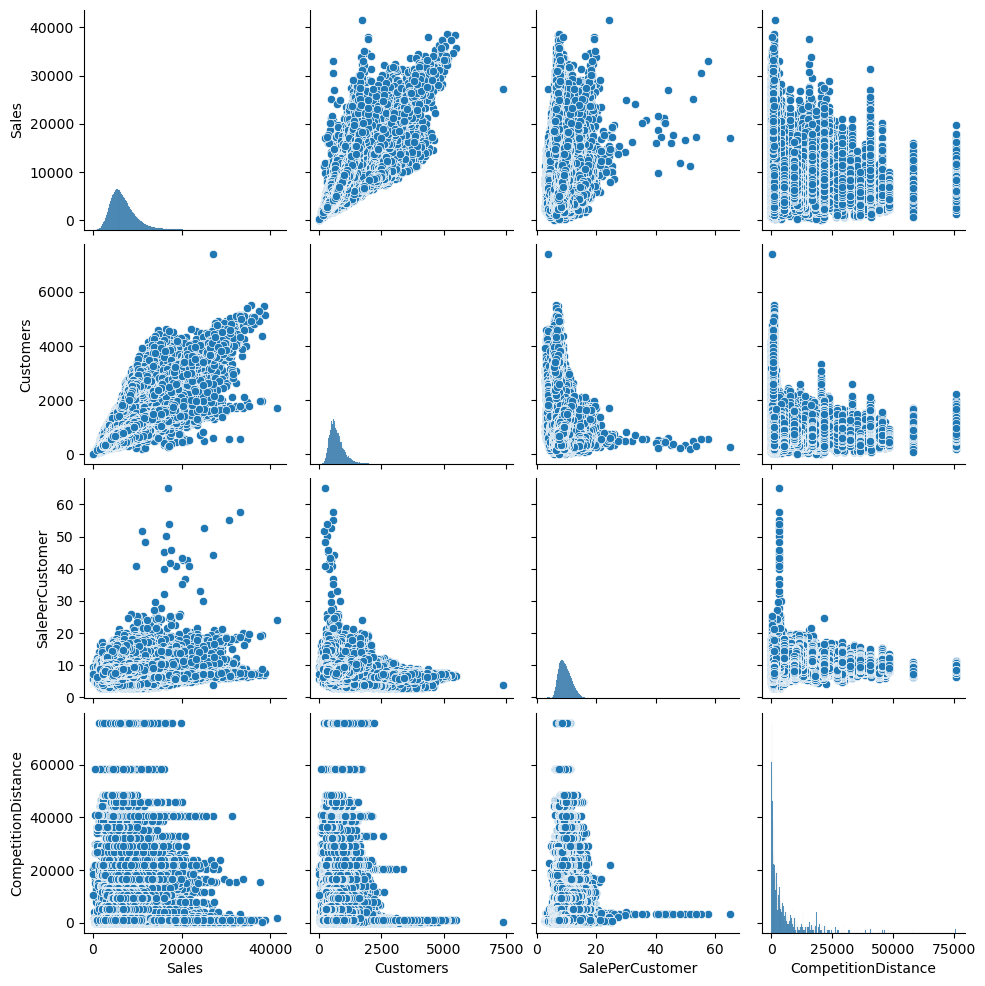

In [23]:
numeric = ['Sales','Customers','SalePerCustomer','CompetitionDistance']
sns.pairplot(train_store[numeric])

In [24]:
from scipy.stats import pearsonr
X = train_store['Sales']
y = train_store['Customers']
corr, _ = pearsonr(X,y)
print('Коэффициент корреляции Пирсона:',corr)

Коэффициент корреляции Пирсона: 0.8235517202000379


C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\981724156.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_store.corr(),vmin=-1,vmax=1,annot=True)


<Axes: >

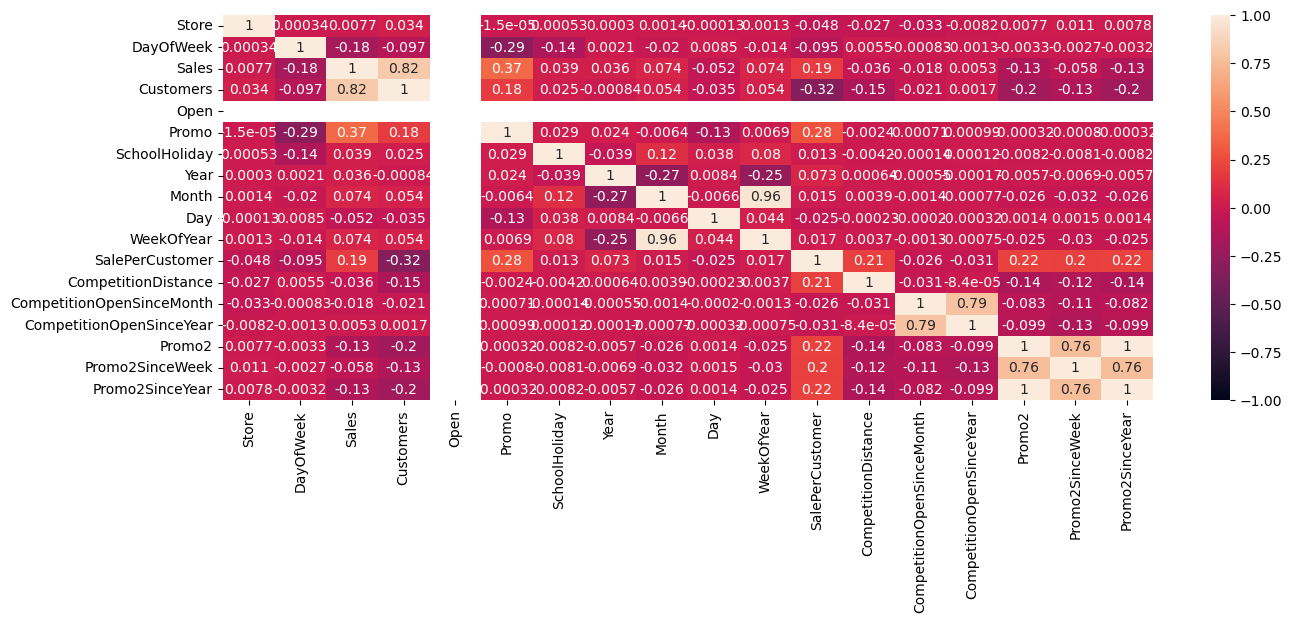

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(train_store.corr(),vmin=-1,vmax=1,annot=True)

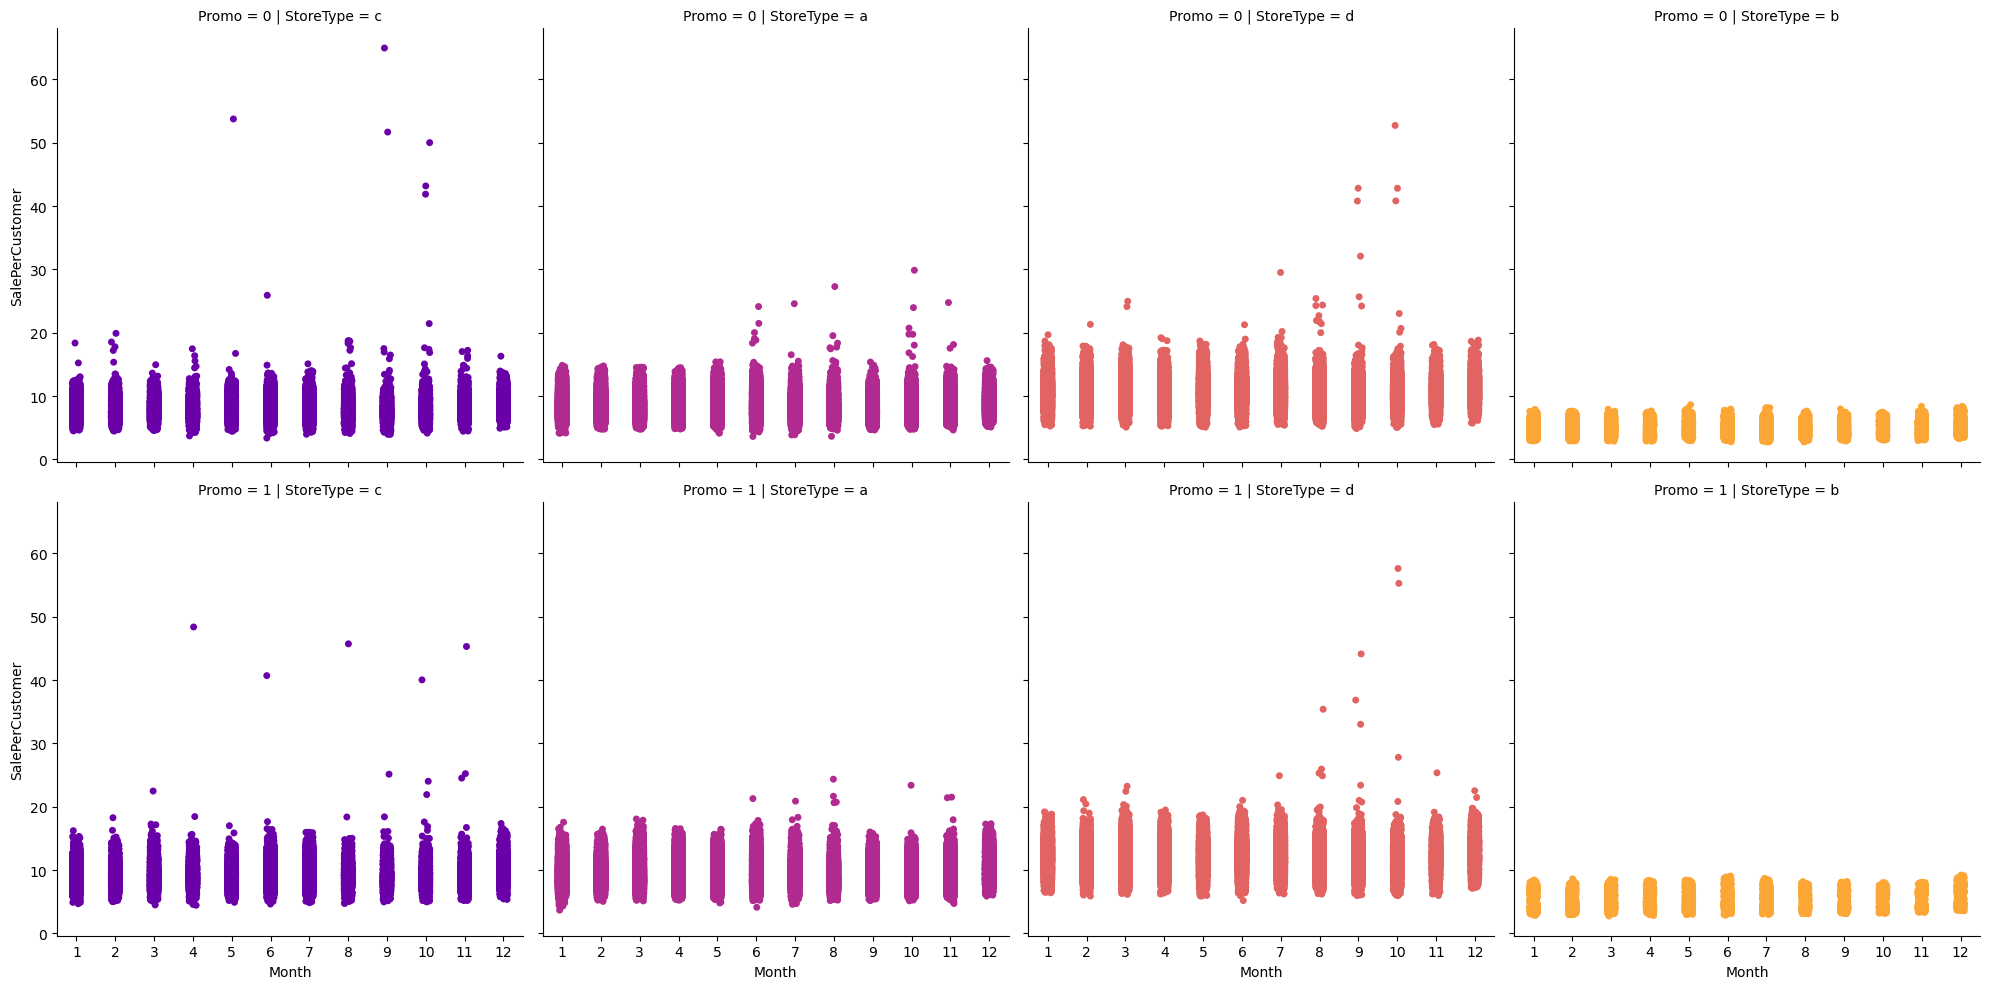

In [26]:
#Тренды в продажах - salepercustomer trends
sns.catplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = 'red') 

In [27]:
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\3733726393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_all = train_store.drop('Open', axis = 1).corr()
C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\3733726393.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


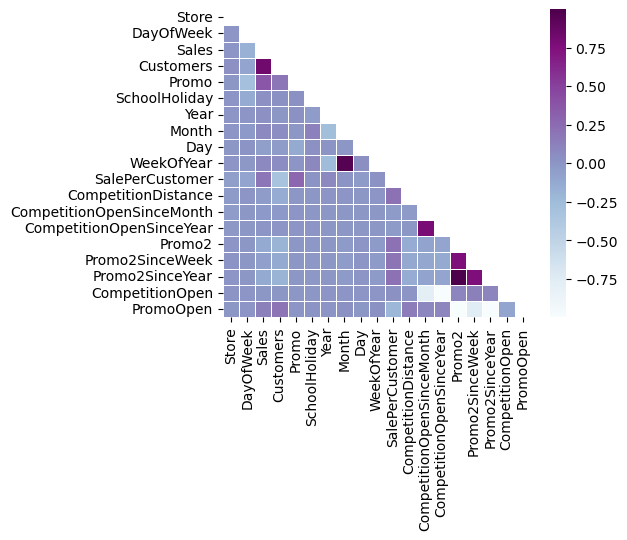

In [28]:
corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (5, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\341450446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Customers'] = train['Customers'] * 1.0


<Axes: xlabel='Date'>

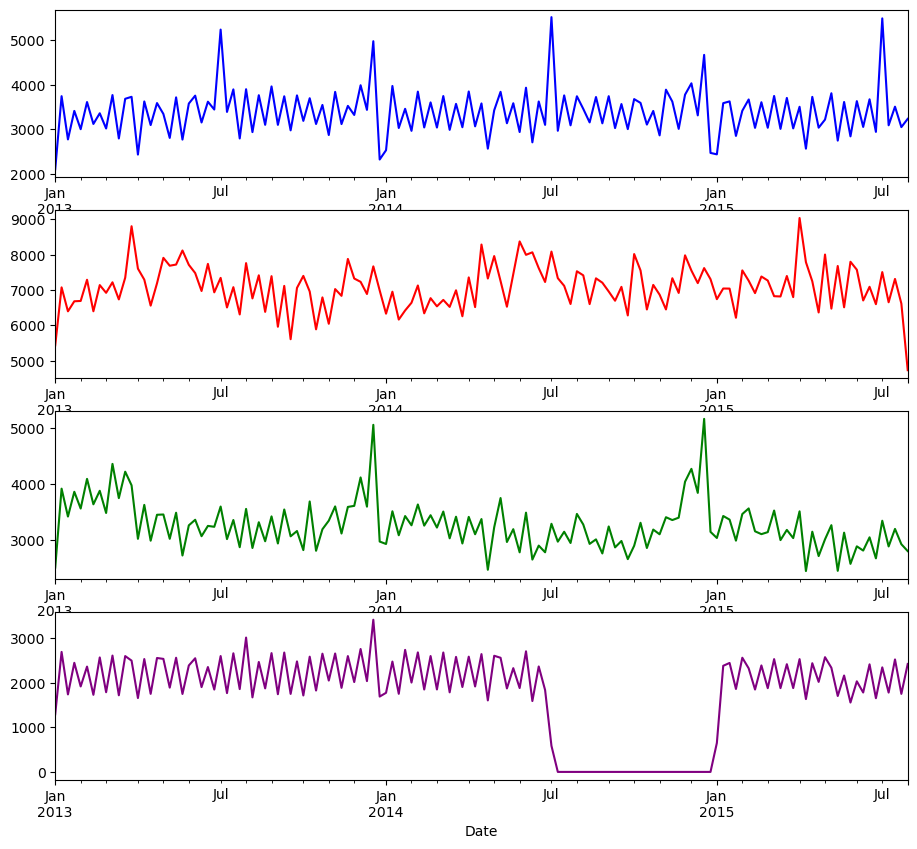

In [29]:
train['Customers'] = train['Customers'] * 1.0

# store types
sales_a = train[train.Store == 2]['Customers']
sales_b = train[train.Store == 85]['Customers'].sort_index(ascending = True) # solve the reverse order
sales_c = train[train.Store == 1]['Customers']
sales_d = train[train.Store == 13]['Customers']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (11, 10))

# store types
sales_a.resample('W').sum().plot(color = 'blue', ax = ax1)
sales_b.resample('W').sum().plot(color = 'red', ax = ax2)
sales_c.resample('W').sum().plot(color = 'green', ax = ax3)
sales_d.resample('W').sum().plot(color = 'purple', ax = ax4)

<Axes: xlabel='Date'>

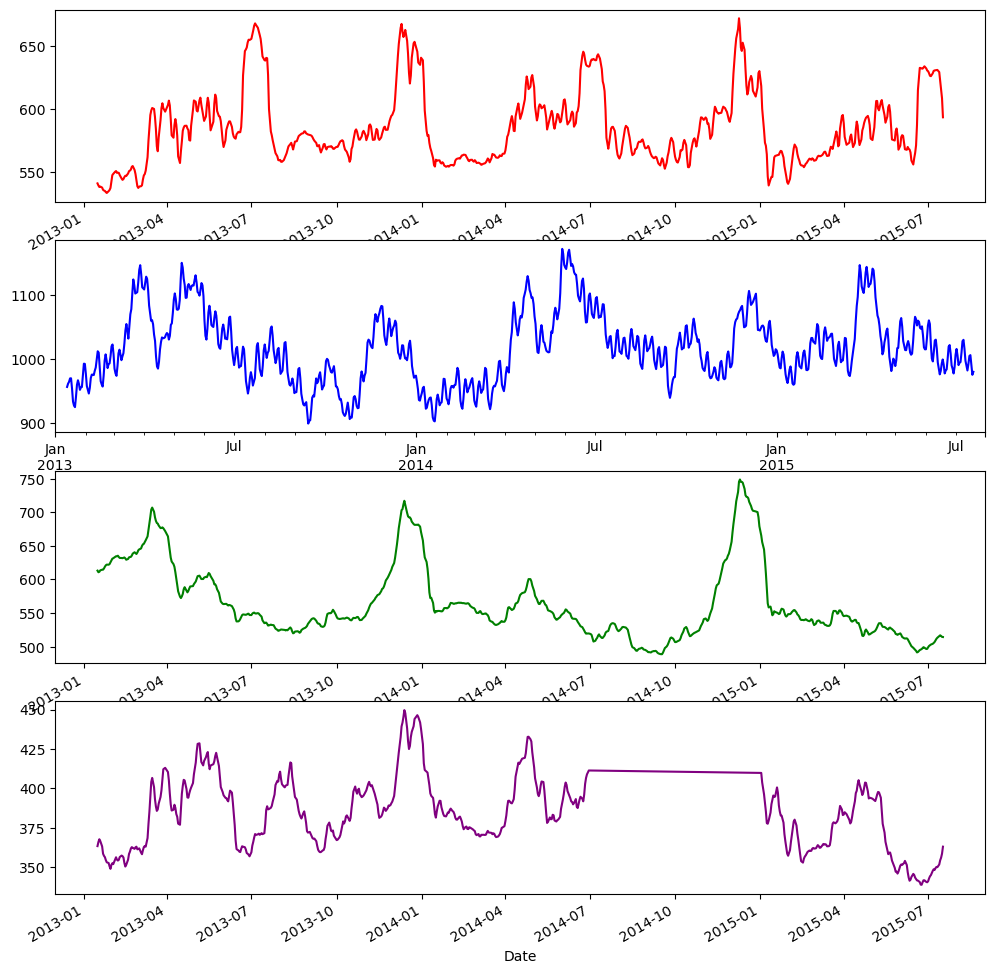

In [30]:
#Yearly trend
import statsmodels.tsa
from statsmodels.tsa.seasonal import seasonal_decompose
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', period = 24)
decomposition_a.trend.plot(color = 'red', ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', period = 24)
decomposition_b.trend.plot(color = 'blue', ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', period = 24)
decomposition_c.trend.plot(color = 'green', ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', period = 24)
decomposition_d.trend.plot(color = 'purple', ax = ax4)

C:\Users\sholo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


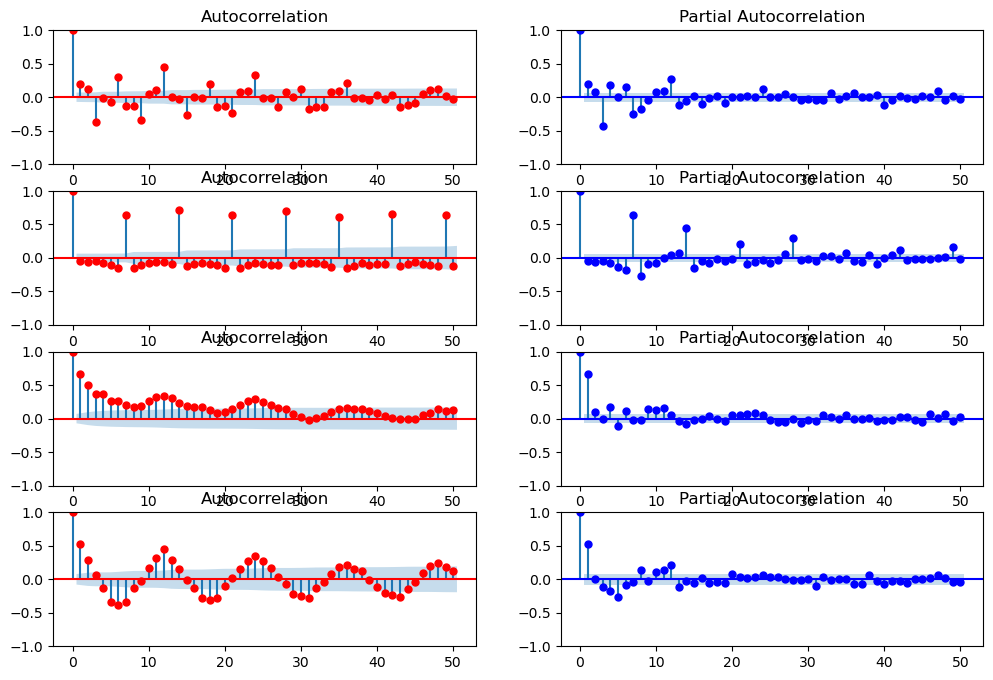

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = 'blue')

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = 'blue')

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = 'blue')

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = 'red')
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = 'blue')
plt.show()

In [32]:
#forecasting with Prophet
df = pd.read_csv('train.csv')
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]
sales = df[df.Store == 1].loc[:, ['Date', 'Customers']]
sales = sales.sort_index(ascending = False)
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales

C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\635468662.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,Date,Customers
1014980,2013-01-02,668
1013865,2013-01-03,578
1012750,2013-01-04,619
1011635,2013-01-05,635
1009405,2013-01-07,785
...,...,...
4460,2015-07-27,612
3345,2015-07-28,560
2230,2015-07-29,523
1115,2015-07-30,546


In [33]:
sales = sales.rename(columns = {'Date': 'ds',
                                'Customers': 'y'})
sales

,ds,y
1014980,2013-01-02,668
1013865,2013-01-03,578
1012750,2013-01-04,619
1011635,2013-01-05,635
1009405,2013-01-07,785
...,...,...
4460,2015-07-27,612
3345,2015-07-28,560
2230,2015-07-29,523
1115,2015-07-30,546


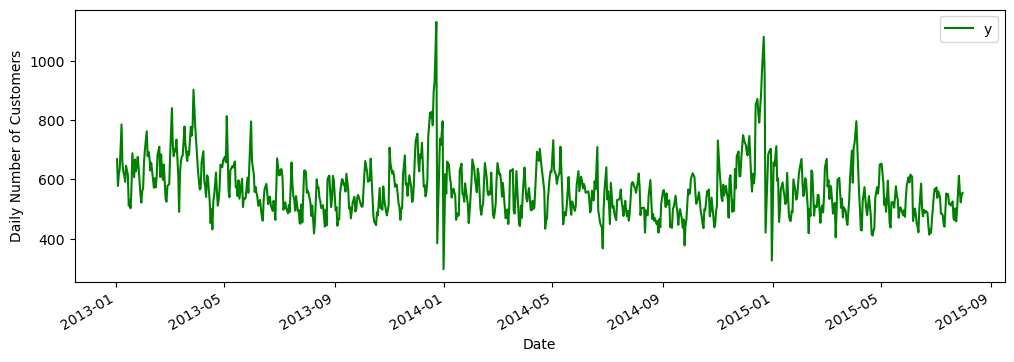

In [34]:
ax = sales.set_index('ds').plot(figsize = (12, 4), color = 'green')
ax.set_ylabel('Daily Number of Customers')
ax.set_xlabel('Date')
plt.show()

In [35]:
#model for holidays
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [36]:
#Prophet model
from prophet import Prophet
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(7)

20:52:30 - cmdstanpy - INFO - Chain [1] start processing
20:52:30 - cmdstanpy - INFO - Chain [1] done processing


First week to forecast.


,ds
816,2015-09-05
817,2015-09-06
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


In [37]:
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
816,2015-09-05,501.997786,373.821630,633.178427
817,2015-09-06,486.731347,356.176666,625.214968
818,2015-09-07,485.534510,350.759052,615.909250
819,2015-09-08,440.870028,320.525326,577.562554
820,2015-09-09,436.116663,296.246420,572.603066
821,2015-09-10,431.464989,305.718025,577.678405
822,2015-09-11,455.914068,325.209757,589.395165


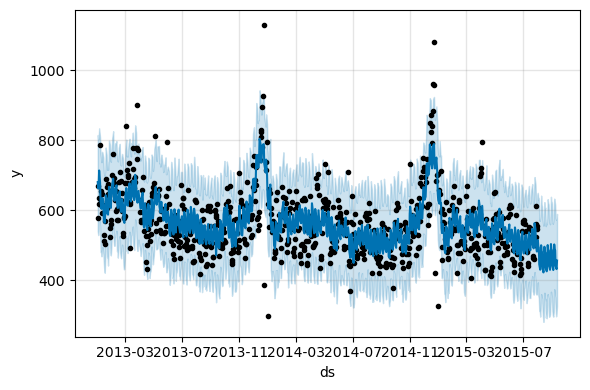

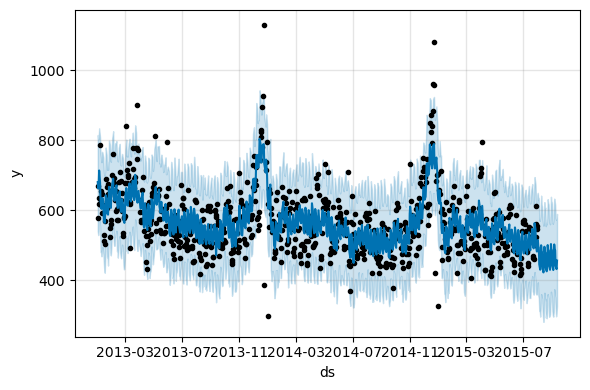

In [38]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})
my_model.plot(forecast, figsize=(6,4))

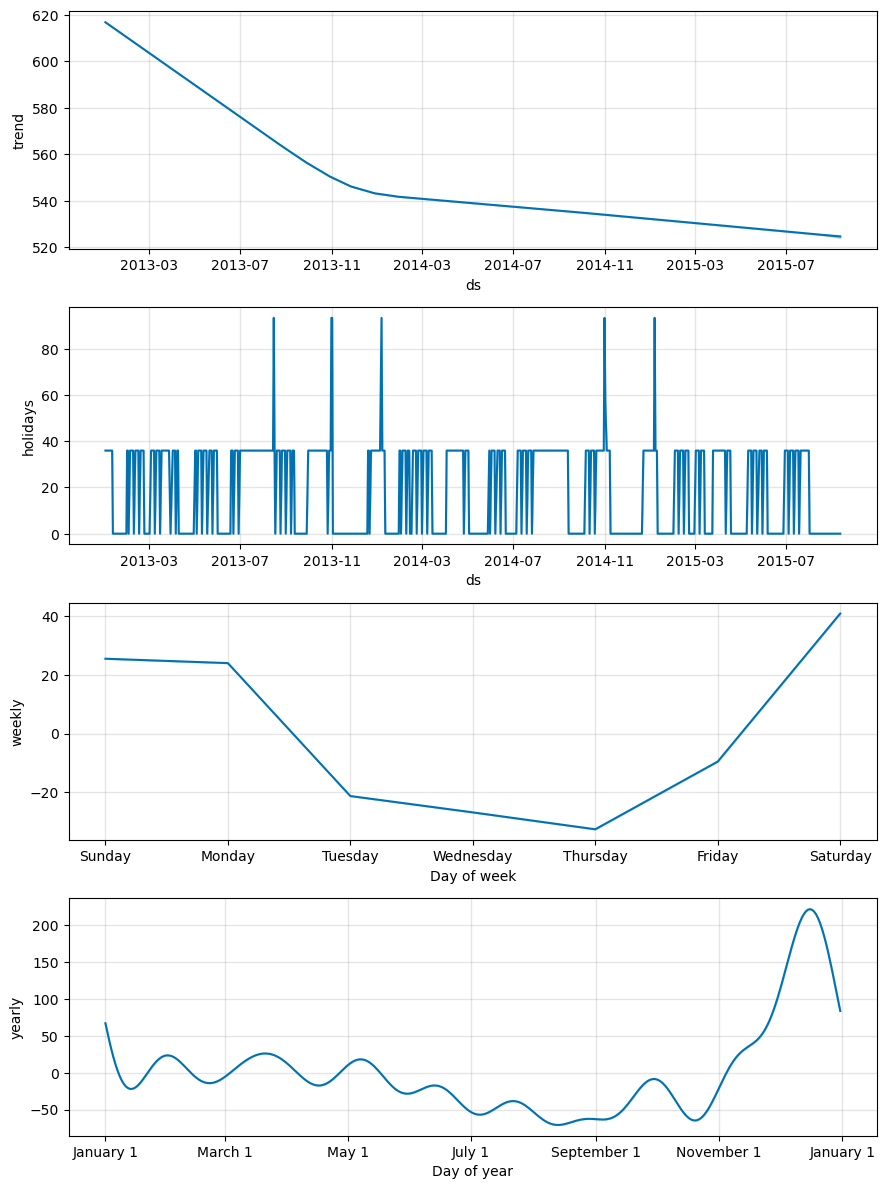

In [39]:
my_model.plot_components(forecast);

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_store['Store'] = labelencoder.fit_transform(train_store['Store'])
train_store['DayOfWeek'] = labelencoder.fit_transform(train_store['DayOfWeek'])
train_store['Open'] = labelencoder.fit_transform(train_store['Open'])
train_store['Promo'] = labelencoder.fit_transform(train_store['Promo'])
train_store['StateHoliday'] = labelencoder.fit_transform(train_store['StateHoliday'])
train_store['SchoolHoliday'] = labelencoder.fit_transform(train_store['SchoolHoliday'])
train_store['Assortment'] = labelencoder.fit_transform(train_store['Assortment'])
train_store['Promo2'] = labelencoder.fit_transform(train_store['Promo2'])
train_store['Promo2SinceWeek'] = labelencoder.fit_transform(train_store['Promo2SinceWeek'])
train_store['Promo2SinceYear'] = labelencoder.fit_transform(train_store['Promo2SinceYear'])
train_store['StoreType'] = labelencoder.fit_transform(train_store['StoreType'])
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,0,4,5263,555,0,1,0,1,2015,7,...,0,1270.0,9.0,2008.0,0,0,0,0,82.0,24187.75
1,0,3,5020,546,0,1,0,1,2015,7,...,0,1270.0,9.0,2008.0,0,0,0,0,82.0,24187.75
2,0,2,4782,523,0,1,0,1,2015,7,...,0,1270.0,9.0,2008.0,0,0,0,0,82.0,24187.75
3,0,1,5011,560,0,1,0,1,2015,7,...,0,1270.0,9.0,2008.0,0,0,0,0,82.0,24187.75
4,0,0,6102,612,0,1,0,1,2015,7,...,0,1270.0,9.0,2008.0,0,0,0,0,82.0,24187.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,291,0,9291,1002,0,1,0,0,2013,1,...,0,1100.0,6.0,2009.0,0,0,0,0,43.0,24156.50
844334,291,5,2748,340,0,0,0,0,2013,1,...,0,1100.0,6.0,2009.0,0,0,0,0,43.0,24156.25
844335,291,4,4202,560,0,0,0,1,2013,1,...,0,1100.0,6.0,2009.0,0,0,0,0,43.0,24156.25
844336,291,3,4580,662,0,0,0,1,2013,1,...,0,1100.0,6.0,2009.0,0,0,0,0,43.0,24156.25


In [41]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Sales','Customers','Year','Month','CompetitionOpenSinceYear','CompetitionOpen','PromoOpen','CompetitionOpenSinceMonth','CompetitionDistance']
scaler = StandardScaler()
train_store[numeric_columns] = scaler.fit_transform(train_store[numeric_columns])

# Просмотр измененных данных
scaled_data_description = train_store[numeric_columns].describe()
scaled_data_description

,Sales,Customers,Year,Month,CompetitionOpenSinceYear,CompetitionOpen,PromoOpen,CompetitionOpenSinceMonth,CompetitionDistance
count,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05,8.443380e+05
mean,-1.357906e-16,1.068585e-16,-8.979779e-14,1.876630e-17,-3.662375e-17,-6.025414e-17,-1.494572e-17,2.446857e-16,-1.837920e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.226280e+00,-1.881328e+00,-1.070341e+00,-1.457833e+00,-1.464042e+00,-6.911451e-01,-1.007168e+00,-1.150071e+00,-6.975600e-01
25%,-6.756073e-01,-6.076293e-01,-1.070341e+00,-8.561403e-01,-1.464042e+00,-6.858023e-01,-1.002654e+00,-1.150071e+00,-6.078668e-01
50%,-1.891090e-01,-2.162973e-01,2.162113e-01,4.639835e-02,6.801381e-01,-6.802814e-01,9.960350e-01,-2.162842e-01,-4.002912e-01
75%,4.523599e-01,3.245883e-01,2.162113e-01,6.480908e-01,6.854825e-01,1.463254e+00,9.973188e-01,9.509496e-01,1.839959e-01
max,1.114598e+01,1.651377e+01,1.502764e+00,1.851476e+00,6.897581e-01,1.465392e+00,9.986440e-01,1.651290e+00,9.022619e+00


In [42]:
train_store = train_store.drop('Assortment',axis=1)
train_store = train_store.drop('PromoInterval',axis=1)

In [43]:
#Структурная идентификация модели, разделение данных
customers = df[df.Store == 1].loc[:, ['Date','Sales', 'Customers']]#определение датафрейма
customers

,Date,Sales,Customers
0,2015-07-31,5263,555
1115,2015-07-30,5020,546
2230,2015-07-29,4782,523
3345,2015-07-28,5011,560
4460,2015-07-27,6102,612
...,...,...,...
1009405,2013-01-07,7176,785
1011635,2013-01-05,4997,635
1012750,2013-01-04,4486,619
1013865,2013-01-03,4327,578


In [65]:
#Разделение данных
from sklearn.model_selection import train_test_split
X = train_store.drop('Customers',axis=1)
y = train_store['Customers']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X = X.to_numpy()
y = y.to_numpy()
print(X_train.shape, Y_train.shape, X_test.shape)

(591036, 21) (591036,) (253302, 21)


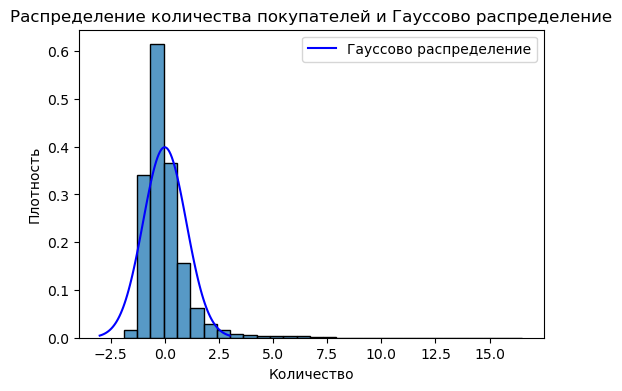

In [45]:
def gaussian_distribution(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

mean_price = train_store['Customers'].mean()
std_price = train_store['Customers'].std()

x_values = np.linspace(mean_price - 3*std_price, mean_price + 3*std_price, 100)
gaussian_curve = gaussian_distribution(x_values, mean_price, std_price)

plt.figure(figsize=(6, 4))
sns.histplot(train_store['Customers'], kde=False, stat='density', bins=30)
plt.plot(x_values, gaussian_curve, label='Гауссово распределение', color='blue')
plt.title('Распределение количества покупателей и Гауссово распределение')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.show()

C:\Users\sholo\AppData\Local\Temp\ipykernel_4004\4238726891.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return (avg_xy - avg_x*avg_y) / (sigma_x*sigma_y)


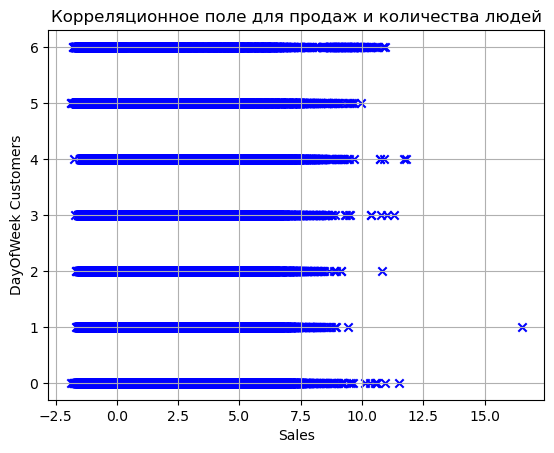

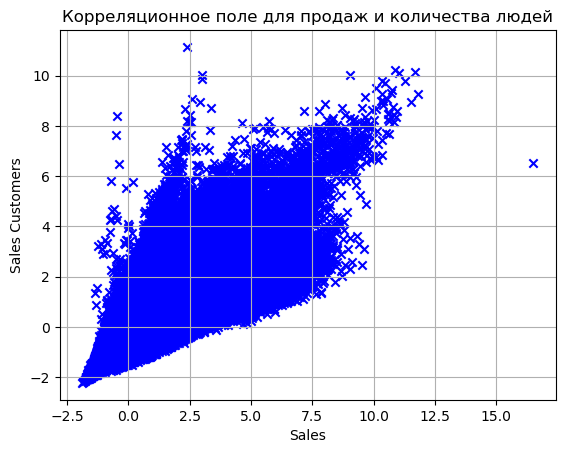

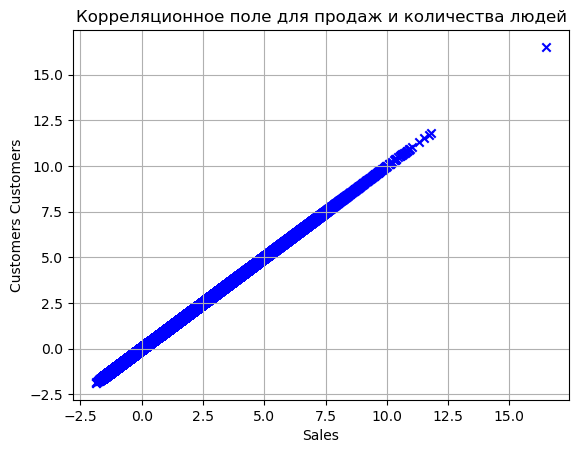

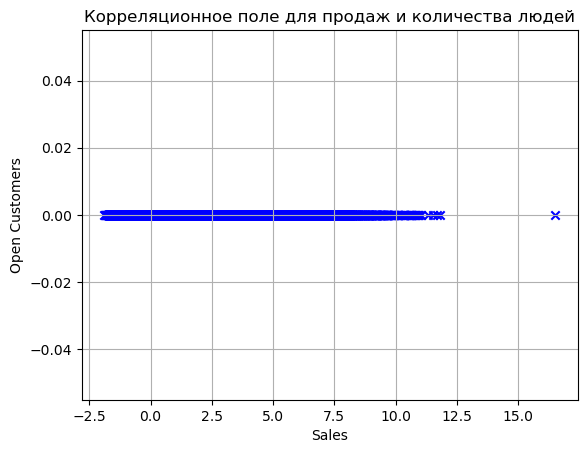

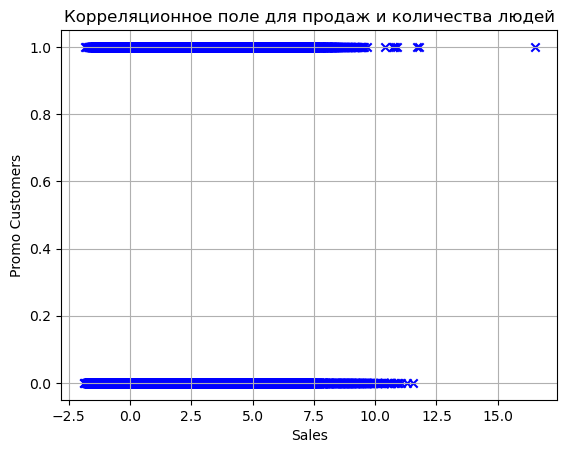

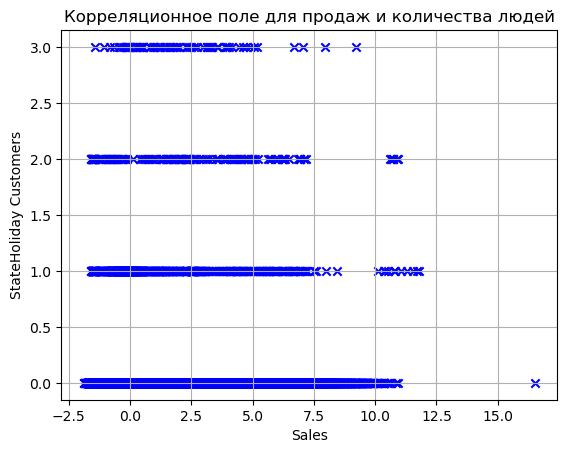

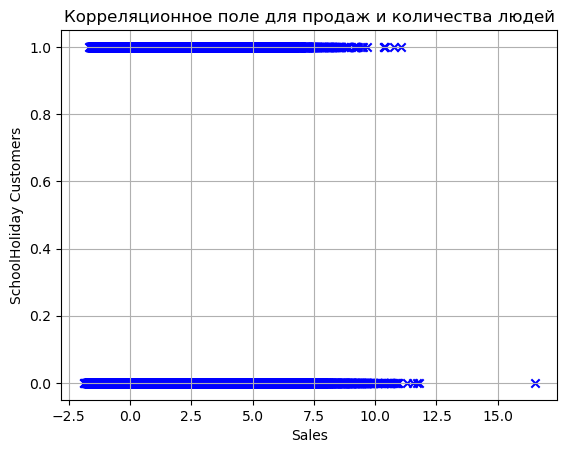

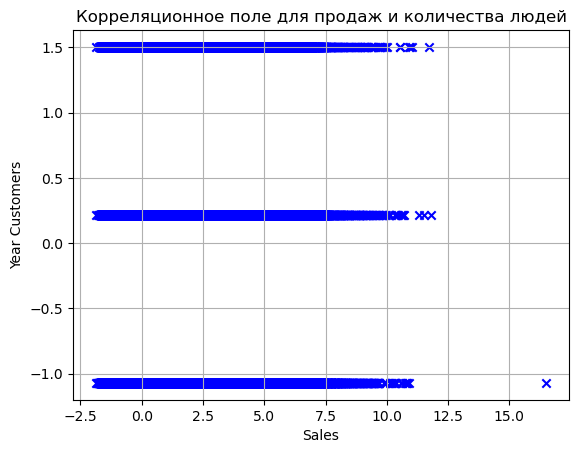

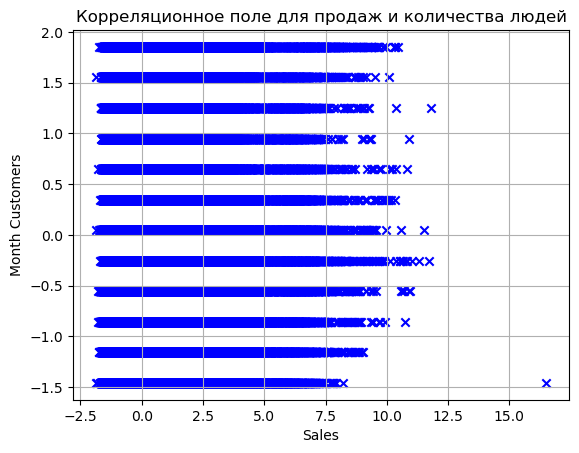

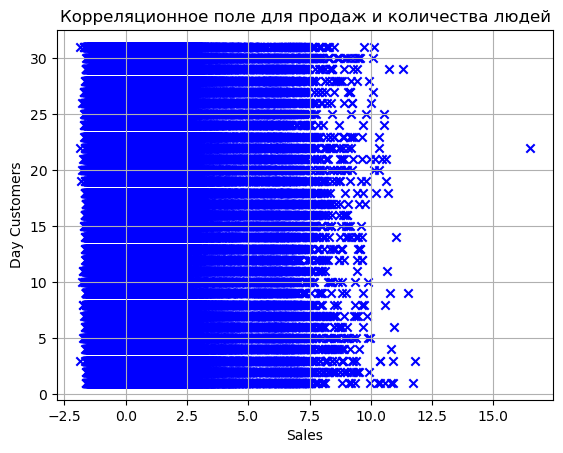

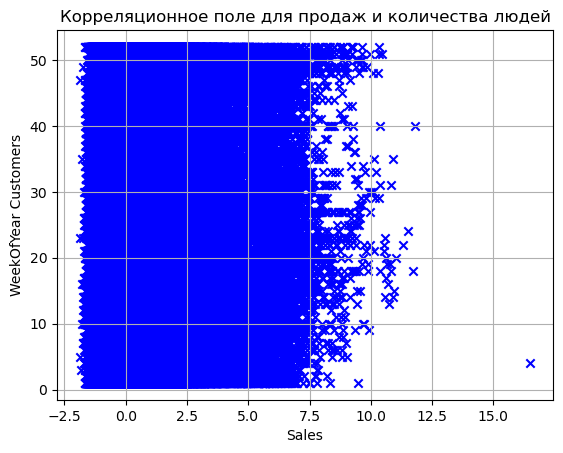

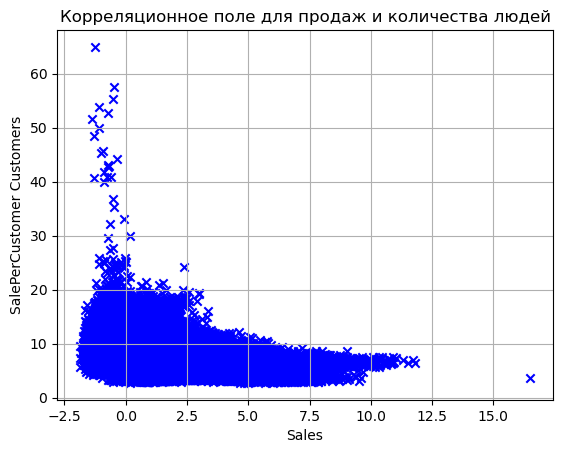

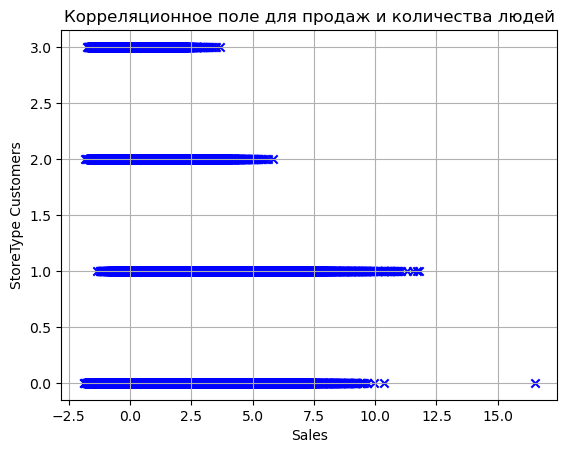

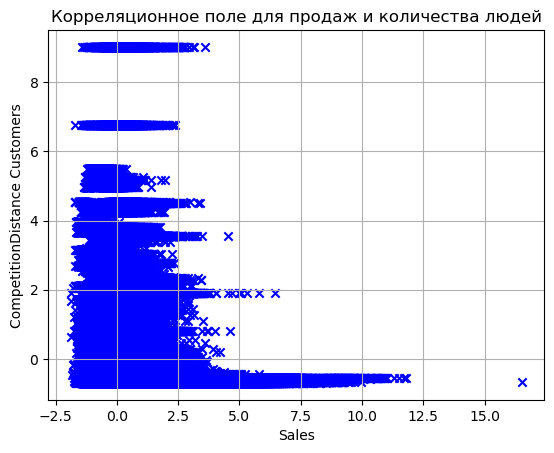

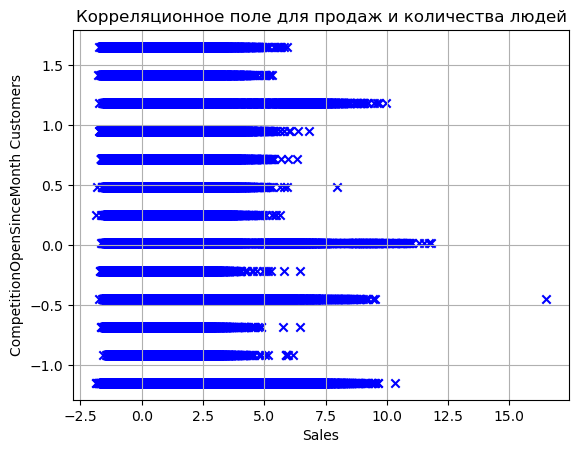

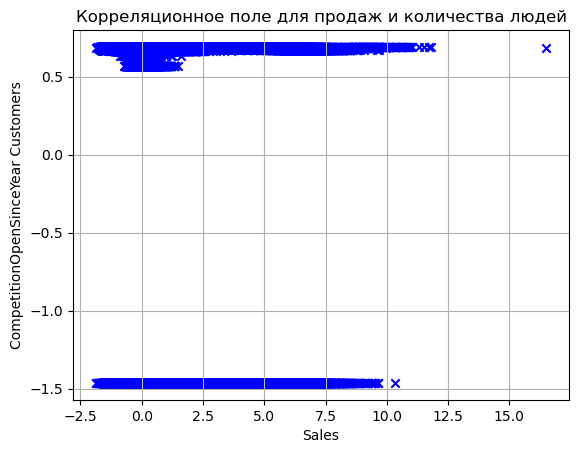

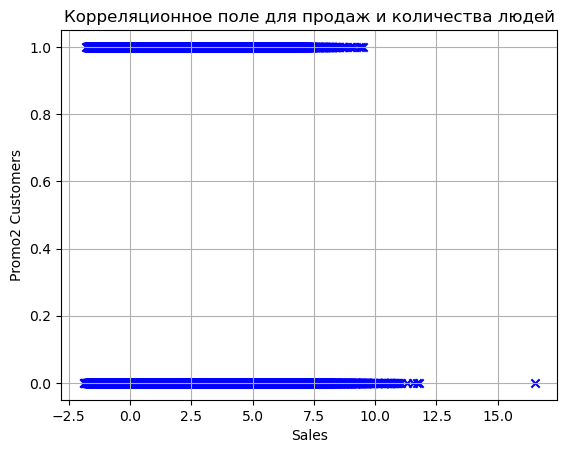

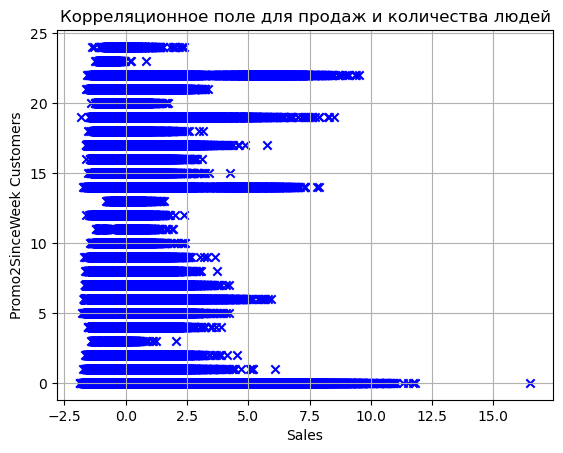

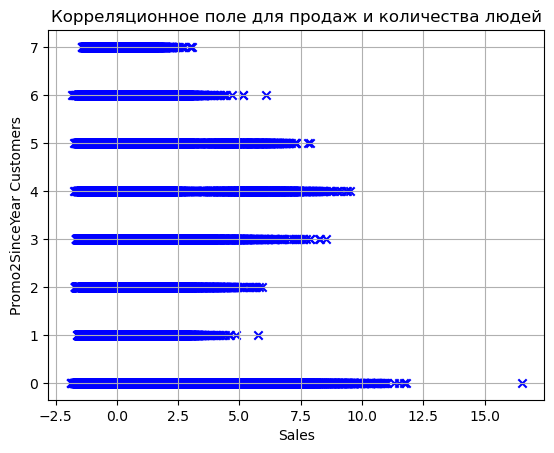

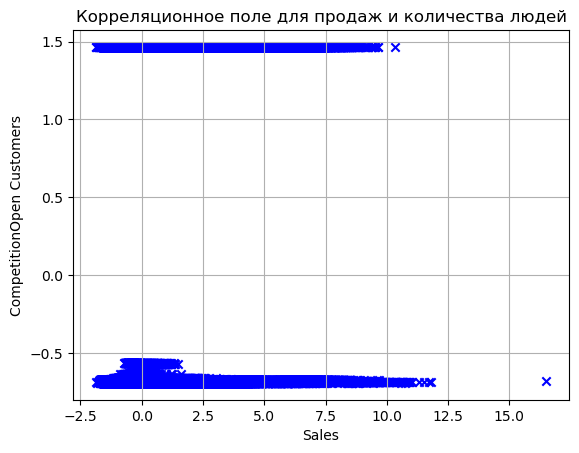

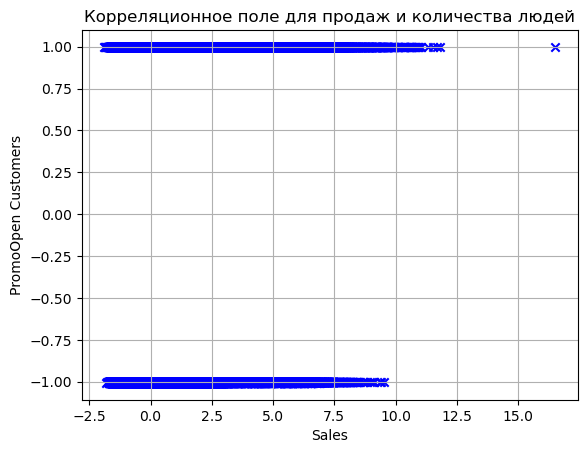

,Factor,Pearson Correlation,Spearman Correlation,Covariance
0,DayOfWeek,-0.097266,-0.170849,-0.167658
1,Sales,0.823551,0.831953,0.823552
2,Open,NaN,-0.995957,0.000000
3,Promo,0.182858,0.024193,0.090902
4,StateHoliday,0.049523,-0.989509,0.002356
5,SchoolHoliday,0.024914,-0.233173,0.009844
6,Year,-0.000842,-0.019699,-0.000842
7,Month,0.053843,0.069671,0.053843
8,Day,-0.035416,-0.047332,-0.307527
9,WeekOfYear,0.053762,0.060470,0.773639


In [46]:
def Pearson(x, y):
    xy = np.multiply(x, y)
    avg_x = np.mean(x)
    avg_y = np.mean(y)
    avg_xy = np.mean(xy)
    sigma_x = np.std(x, ddof=1)
    sigma_y = np.std(y, ddof=1)
    return (avg_xy - avg_x*avg_y) / (sigma_x*sigma_y)

def Covariance(x, y):
    avg_x = np.mean(x)
    avg_y = np.mean(y)
    return np.mean((x - avg_x) * (y - avg_y))

def Spearman_coef(x, y):
    n = len(x)
    x_sorted = sorted(x)
    y_sorted = sorted(y)
    n_x = {x_sorted[i]: i + 1 for i in range(n)}
    n_y = {y_sorted[i]: i + 1 for i in range(n)}
    d2 = [(n_x[x[i]] - n_y[y[i]]) ** 2 for i in range(n)]
    return 1 - ((6 * sum(d2)) / (n * (n ** 2 - 1)))

x = train_store['Customers']

correlation_df = pd.DataFrame(columns=['Factor', 'Pearson Correlation', 'Spearman Correlation', 'Covariance'])
for column in train_store.columns[1:]:
    if column != 'Customers' and np.issubdtype(train_store[column].dtype, np.number):
        y = train_store[column]
        pearson_corr = Pearson(x, y)
        spearman_corr = Spearman_coef(x, y)
        covariance = Covariance(x, y)
        
        new_row = pd.DataFrame([{
            'Factor': column,
            'Pearson Correlation': pearson_corr,
            'Spearman Correlation': spearman_corr,
            'Covariance': covariance
        }])
        correlation_df = pd.concat([correlation_df, new_row], ignore_index=True)

for i in train_store.columns[1:]:
    y_visualize = train_store[i]

    fig, ax = plt.subplots()
    ax.scatter(x, y_visualize, color = "blue", marker='x')
    ax.grid(True)
    ax.set_xlabel('Sales')
    ax.set_ylabel(f'{i} Customers')
    plt.title('Корреляционное поле для продаж и количества людей')
    plt.show()
    
correlation_df

(591036, 21) (591036,)


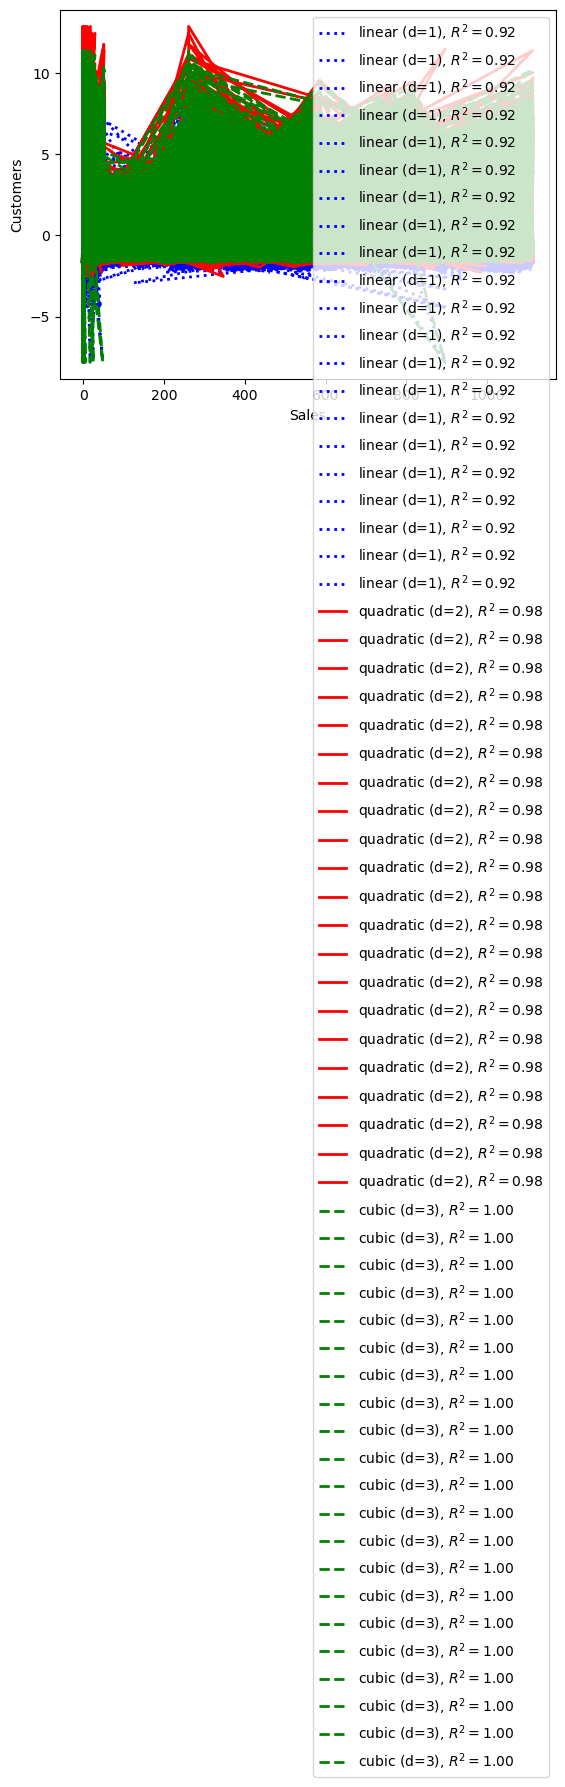

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_train)
X_cubic = cubic.fit_transform(X_train)
print(X_train.shape, Y_train.shape)
# fit features
regr = regr.fit(X_train, Y_train)
y_lin_fit = regr.predict(X_test)
linear_r2 = r2_score(Y_test, y_lin_fit)

regr_2 = regr.fit(X_quad, Y_train)
y_quad_fit = regr.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(Y_test, y_quad_fit)

regr_3 = regr.fit(X_cubic, Y_train)
y_cubic_fit = regr.predict(cubic.fit_transform(X_test))
cubic_r2 = r2_score(Y_test, y_cubic_fit)


# plot results

plt.plot(X_test, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_test, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_test, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('Sales')
plt.ylabel('Customers')
plt.legend(loc='upper right')


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
y_lin = linreg.predict(X_test)
linear_r2 = r2_score(Y_test, y_lin)
mse_linear = mean_squared_error(Y_test, y_lin)
print('Linear r2:',linear_r2)
print('Linear mse:',mse_linear)

lasso = Lasso(alpha=0.1, random_state=17)
lasso.fit(X_train, Y_train)
y_lasso = lasso.predict(X_test)
lasso_r2 = r2_score(Y_test, y_lasso)
mse_lasso = mean_squared_error(Y_test,y_lasso)
print('Lasso r2:',lasso_r2)
print('Lasso mse:',mse_lasso)

forest = RandomForestRegressor(random_state=17, n_estimators=100, min_samples_split=2, max_depth=5)
forest.fit(X_train,Y_train)
y_forest = forest.predict(X_test)
forest_r2 = r2_score(Y_test, y_forest)
mse_random = mean_squared_error(Y_test,y_forest)
print('Random forest r2:', forest_r2)
print('Random forest mse:',mse_random)

gb = GradientBoostingRegressor(random_state=17)
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
gb_r2 = r2_score(Y_test, gb_pred)
mse_gb = mean_squared_error(Y_test,gb_pred)
print('Gradient Boosting r2:', gb_r2)
print('Gradient Boosting mse:',mse_gb)

Linear r2: 0.9180395939124962
Linear mse: 0.0820047280601318
Lasso r2: 0.8993221784824296
Lasso mse: 0.10073226536262396
Random forest r2: 0.9493345837942452
Random forest mse: 0.05069281469360347
Gradient Boosting r2: 0.997400682064773
Gradient Boosting mse: 0.0026007235761197497


In [79]:
residuals = Y_test - y_lin
rss = np.sum(residuals**2)
n = X_train.shape[0]
p = X_train.shape[1]
mse = rss / (n - p - 1)
X_train = X_train.values.reshape(-1,1)

X_train_augmented = np.c_[np.ones((X_train.shape[0], 1)), X_train]
xtx_inv = np.linalg.inv(X_train_augmented.T @ X_train_augmented)

se = np.sqrt(np.diagonal(mse * xtx_inv))
t_stats = np.hstack([linreg.intercept_, linreg.coef_]) / se.reshape(-1,1)
p_values = [2 * (1 - stats.t.cdf(np.abs(i), (n - p - 1))) for i in t_stats]
coef_p_values = zip(np.hstack([linreg.intercept_, linreg.coef_]), p_values)

print('Коэффициенты линейной регрессиии их p-значения:')
for coef, p in coef_p_values:
    print(coef, p)
print(f"Y={linreg.intercept_}"+ ''.join([f"+({linreg.coef_[i]}*x{i})" for i in range(20)]))

Коэффициенты линейной регрессиии их p-значения:
507.37298854459556 [0.         0.90360042 0.         0.         0.99999996 0.
 0.         0.         0.         0.         0.00421117 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
6.591010366743613e-06 [0.         0.         0.         0.         0.99999469 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Y=507.37298854459556+(6.591010366743613e-06*x0)+(0.009831957788798973*x1)+(0.9284666189326671*x2)+(-2.5721647034515627e-12*x3)+(-0.01959214037482522*x4)+(0.28348844012395363*x5)+(-0.0024779364957920233*x6)+(0.39414243115796954*x7)+(-0.003947403396376352*x8)+(-0.000155743978831906*x9)+(0.010440310183162847*x10)+(-0.23528352726528826*x11)+(0.034740701281443846*x12)+(-0.00896362955085215*x13)+(-0.008473914265131458*x14)+(-0.002968726299747102*x15)+(-1011.462639957

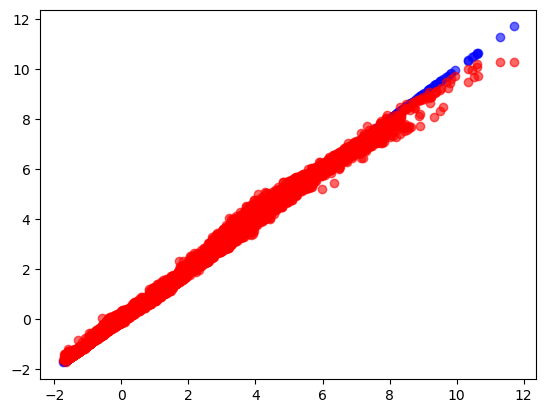

In [59]:
plt.scatter(Y_test,Y_test, alpha=0.6, color='blue', label='Amount of customers')

# Предсказанные цены
plt.scatter(Y_test, gb_pred, alpha=0.6, color='red', label='Predicted amount of customers')

In [60]:
gb.score(X_test,Y_test)


0.997400682064773

In [61]:
print('Predicted values:', gb_pred)

Predicted values: [-0.5318732  -0.36834778 -0.29638736 ... -0.02785446  0.82612958
  0.35289871]


In [62]:
from sklearn.feature_selection import f_regression
gb_pred = gb_pred.reshape(-1,1)
f_val, p_val = f_regression(gb_pred, Y_test)
print('F-значение:', f_val, p_val)

F-значение: [97455553.71655683] [0.]


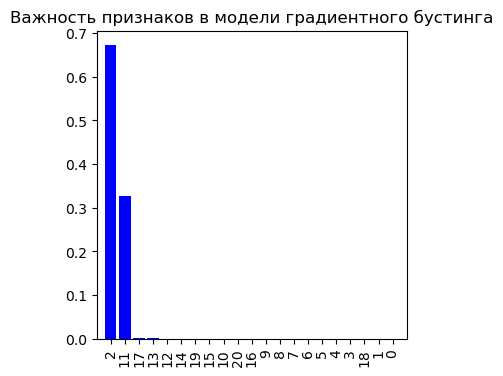

In [94]:
# Важность признаков для градиентного бустинга
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(4, 4))
plt.title("Важность признаков в модели градиентного бустинга")
plt.bar(range(X_train.shape[1]), importances_gb[indices_gb], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices_gb, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

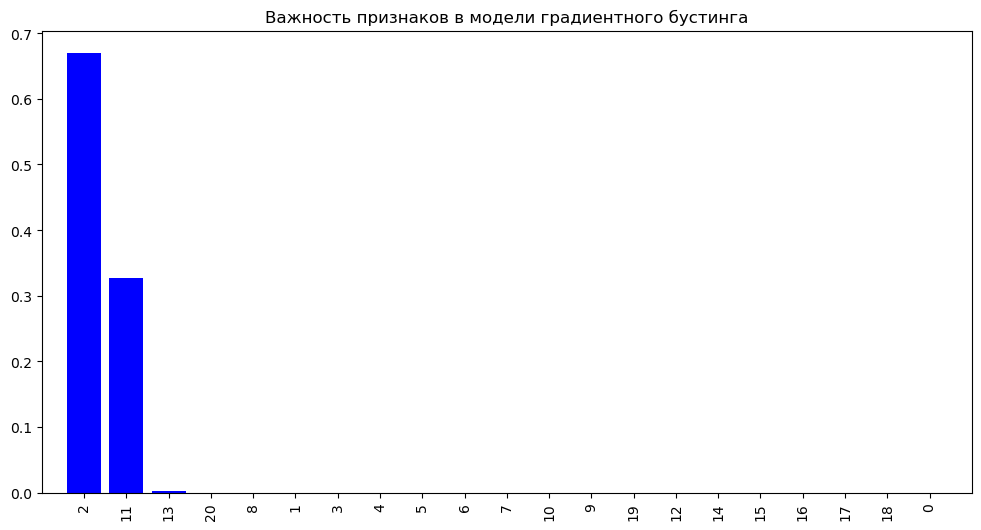

In [92]:
importances_forest = forest.feature_importances_
indices_forest = np.argsort(importances_forest)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Важность признаков в модели градиентного бустинга")
plt.bar(range(X_train.shape[1]), importances_forest[indices_forest], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices_forest, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = train_store
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

C:\Users\sholo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\sholo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                      feature         VIF
0                       Store    4.025800
1                   DayOfWeek    3.526774
2                       Sales   11.775538
3                   Customers   12.199935
4                        Open         NaN
5                       Promo    2.432390
6                StateHoliday    1.006295
7               SchoolHoliday    1.308497
8                        Year         inf
9                       Month         inf
10                        Day    4.585414
11                 WeekOfYear   51.322820
12            SalePerCustomer   95.866071
13                  StoreType    2.349982
14        CompetitionDistance    1.112345
15  CompetitionOpenSinceMonth         inf
16   CompetitionOpenSinceYear         inf
17                     Promo2  265.417359
18            Promo2SinceWeek    4.039493
19            Promo2SinceYear    6.546965
20            CompetitionOpen         inf
21                  PromoOpen  125.171238


In [68]:
from sklearn.model_selection import GridSearchCV

parameters = { 'loss' : ['absolute_error', 'squared_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'squared_error'],
              'max_features' : [ 'sqrt', 'log2']
             }
grid = GridSearchCV(GradientBoostingRegressor(),parameters, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
model = grid.fit(X_train,Y_train)
best_params = model.best_params_
best_model = model.best_estimator_
print(best_params)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
{'criterion': 'squared_error', 'learning_rate': 0.25, 'loss': 'squared_error', 'max_features': 'sqrt'}


In [70]:
from sklearn.metrics import mean_absolute_error
best_gb_model = GradientBoostingRegressor(criterion='squared_error', learning_rate = 0.25, loss ='squared_error', max_features='sqrt')
best_gb_model.fit(X_train, Y_train)
gb_best_pred = best_gb_model.predict(X_test)
mae = mean_absolute_error(Y_test, gb_best_pred)
mse = mean_squared_error(Y_test, gb_best_pred)
r2 = r2_score(Y_test, gb_best_pred)

print("Средняя абсолютная ошибка (MAE):", mae)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)

Средняя абсолютная ошибка (MAE): 0.10306748238413034
Среднеквадратичная ошибка (MSE): 0.02304964385840295
Коэффициент детерминации (R²): 0.9769628140291889


In [80]:
from scipy.stats import ttest_ind
ttest_statistic, pvalue = ttest_ind(gb_best_pred, Y_test)
print("T-test statistic:", ttest_statistic)
print("p-value:", pvalue)
if pvalue < 0.05:
    print("Model is statistically significant at 0.05 level")
else:
    print("Model is not statistically significant at 0.05 level")

T-test statistic: -0.06373974055551841
p-value: 0.9491774858270933
Model is not statistically significant at 0.05 level


In [57]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

# Создание модели OLS (метод наименьших квадратов)
ols_model = sm.OLS(Y_train, X_train)

# Обучение модели OLS
results = ols_model.fit()

# Вывод результатов
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Customers   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.987e+05
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:18:49   Log-Likelihood:            -1.1313e+05
No. Observations:              675470   AIC:                         2.263e+05
Df Residuals:                  675450   BIC:                         2.265e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Users\sholo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


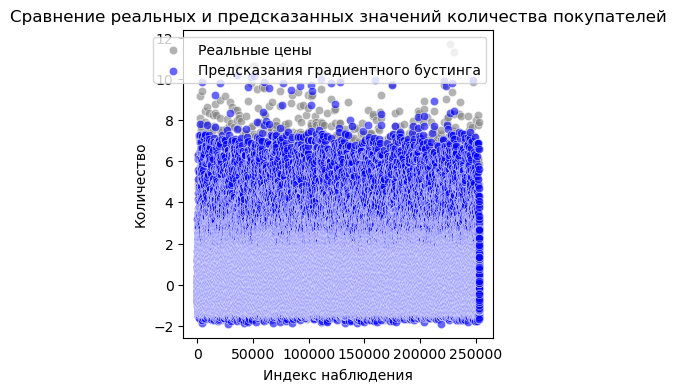

In [76]:
plt.figure(figsize=(4, 4))

# График реальных значений
sns.scatterplot(x=range(len(Y_test)), y=Y_test, color='gray', alpha=0.6, label='Реальные цены')

# График предсказанных цен градиентным бустингом
sns.scatterplot(x=range(len(Y_test)), y=gb_best_pred, color='blue', alpha=0.6, label='Предсказания градиентного бустинга')

plt.title('Сравнение реальных и предсказанных значений количества покупателей')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Количество')
plt.legend()
plt.show()